In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Load the data
train_data = pd.read_csv('fhs_train.csv')
test_data = pd.read_csv('fhs_test.csv')

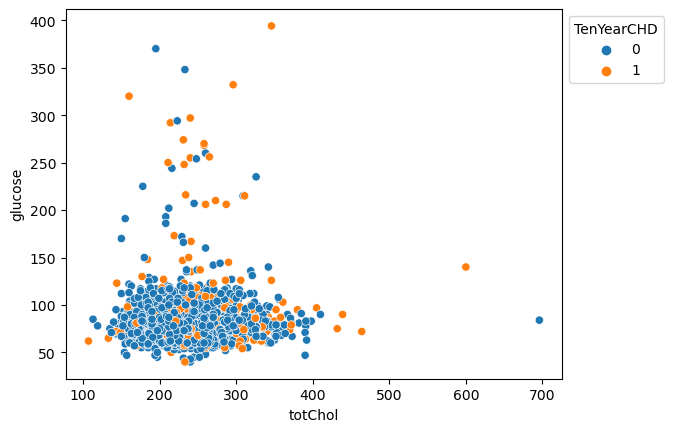

In [294]:
import seaborn as sns

train_data = train_data.dropna(subset=['totChol'])
train_data = train_data.dropna(subset=['glucose'])
test_data = test_data.dropna(subset=['totChol'])
test_data = test_data.dropna(subset=['glucose'])

# totChol = train_data[['totChol']]
# glucose = train_data[['glucose']]
# TenYearCHD = train_data['TenYearCHD']

# X_test = test_data[['totChol']]
# y_test = test_data['TenYearCHD']


this_plot = sns.scatterplot(data=train_data,x='totChol',y='glucose',hue='TenYearCHD')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) 

In [295]:
from sklearn.neighbors import KNeighborsClassifier

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
# Select features/target variable for analysis:
y_train = train_data['TenYearCHD']
X_train = train_data.loc[:,['totChol','glucose']] # Create feature matrix

# Max-min normalize the features:
X_train = X_train.apply(maxmin)

y_test = test_data['TenYearCHD']
X_test = test_data.loc[:,['totChol','glucose']] 

X_test = X_test.apply(maxmin)


# Fit the model:
model = KNeighborsClassifier(n_neighbors=7) # Create a sk model for k=3
classifier_model = model.fit(X_train,y_train) # Train the model on our data

In [296]:

# Calculate the accuracy of the model
accuracy = classifier_model.score(X_test, y_test)  #Determine how accurate the prediction of Y_Test is
print("Accuracy:", accuracy)

Accuracy: 0.806282722513089


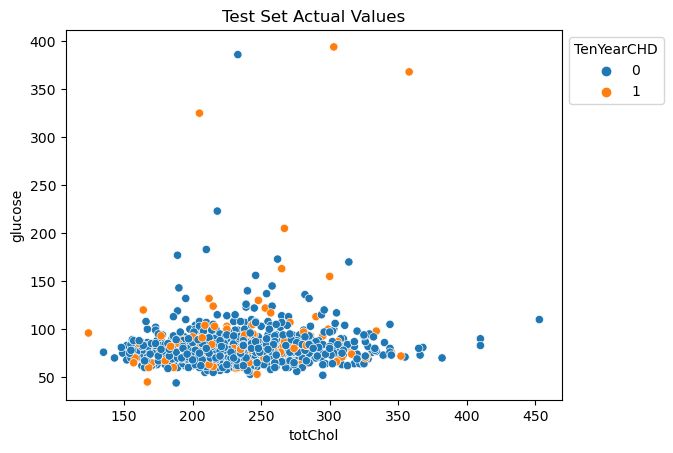

In [297]:
#make th plot for X TEST vs Y TEST


# test_data1 = test_data[test_data['TenYearCHD']==0]

this_plot = sns.scatterplot(data=test_data,x='totChol',y='glucose',hue='TenYearCHD')
this_plot.set_title('Test Set Actual Values')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) 



#make the plot for X TEST vs Y PRED

#COMPARE

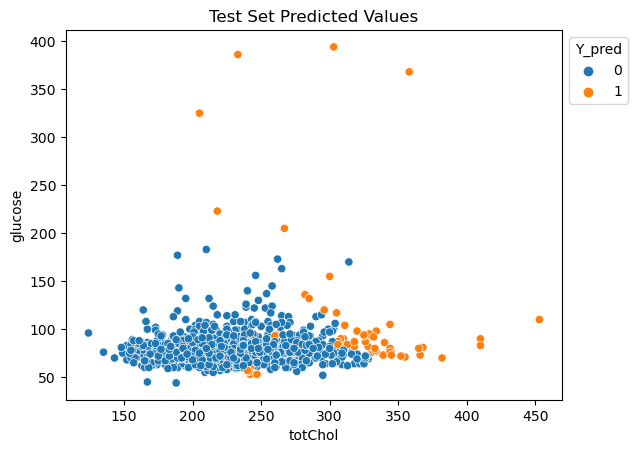

In [298]:
from sklearn.metrics import r2_score


Y_pred = classifier_model.predict(X_test) # Fit the model to the points
test_data['Y_pred'] = Y_pred


# test_data = test_data[test_data['Y_pred']==1]



this_plot = sns.scatterplot(data=test_data,x='totChol',y='glucose',hue='Y_pred') 
this_plot.set_title('Test Set Predicted Values')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas